<a href="https://colab.research.google.com/github/Gauravrakesh/Multimodal-search-implementation-with-RAG-/blob/main/Multi_modal_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Vertex AI SDK and required Packages**

In [ ]:
%pip install --upgrade --user --quiet google-cloud-aiplatform

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

#**Initialize Vertex AI SDK**

In [ ]:

import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

In [ ]:
PROJECT_ID = "calm-suprstate-438017-i3"  # @param {type:"string"}
LOCATION = "asia-south1"  # @param {type:"string"}


import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

## **PIL = Python Imaging Library**
used for opening , manipulating and saving many different image file formats

In [ ]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

In [ ]:
from vertexai.generative_models import (
    GenerationConfig,
    Image,
)

def gemini(prompt, model):
    responses = model.generate_content(prompt,
                                     stream=True)

    response_text = ""
    for response in responses:
        response_text += response.text

    return response_text

### Define a function for displaying the images

In [ ]:
def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):  #This line checks if the current item (content) is an instance of Image
            display_images([content])
        elif isinstance(content, Part): #this line checks if the item is an instance of Part (likely a custom class representing some kind of file or media part, such as an image stored remotely).

            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

## **Function for taking the image input and generating output from that**

In [ ]:

def gemini_vision(contents_image, model):

    responses = model.generate_content(
        contents_image,
        stream=True)

    response_text = ""
    for response in responses:
        response_text += response.text
    return response_text

### **Function for taking model parameters like top_k, temp, top_p  into consideration while generating the output**

In [ ]:


def gemini_vision_parameters(contents_image, model, config):

    responses = model.generate_content(
        contents=contents_image,
        generation_config=config,
        stream=True
    )

    response_text = ""
    for response in responses:
        response_text += response.text

    return response_text

##**download images from bucket**

In [ ]:

! gsutil cp "gs://dlai-sc-gemini-bucket/Andrew_power_tools.png" ./andrew_power_tools.png
! gsutil cp "gs://dlai-sc-gemini-bucket/panda.png" ./panda.png

Copying gs://dlai-sc-gemini-bucket/Andrew_power_tools.png...
/ [1 files][710.5 KiB/710.5 KiB]                                                
Operation completed over 1 objects/710.5 KiB.                                    
Copying gs://dlai-sc-gemini-bucket/panda.png...
/ [1 files][974.9 KiB/974.9 KiB]                                                
Operation completed over 1 objects/974.9 KiB.                                    


# **Multimodal Prompting and Parameter Control**

### **Load the gemini-1.0-pro-002 model**

In [ ]:
from vertexai.generative_models import GenerativeModel

In [ ]:
model = GenerativeModel("gemini-1.0-pro-002")

In [ ]:
gemini("What is a multimodal model?", model = model)


'A multimodal model is a type of artificial intelligence (AI) that can process and understand information from multiple modalities, such as text, images, and video. This allows the model to generate more comprehensive and accurate responses than models that are only trained on a single modality.\n\nMultimodal models are often used for tasks such as natural language processing (NLP), computer vision, and machine translation. They can be used to improve the performance of these tasks by providing the model with more information to work with. For example, a multimodal model used for NLP could use both the text and the audio of a conversation to generate a more accurate transcript.\n\nMultimodal models are becoming increasingly popular as they are able to handle more complex and realistic tasks than models that are only trained on a single modality. As the field of AI continues to develop, we can expect to see even more innovative uses for multimodal models in the future.'

### **Under the hood of the helper function**

In [ ]:
prompt_1 = """
who won the Haryana state election in bharat in 2024"
"""

**stream=True** processes the response as it being generated.

With **stream=False**, you have to wait until the entire response has been generated before it can be proccessed and printed.


In [ ]:
response_1 = model.generate_content(prompt_1, stream=True)

In [ ]:
response_1

<generator object _GenerativeModel._generate_content_streaming at 0x7fd53482a030>

In [ ]:
for response in response_1:
  print(response)

candidates {
  content {
    role: "model"
    parts {
      text: "The"
    }
  }
}
model_version: "gemini-1.0-pro-002"

candidates {
  content {
    role: "model"
    parts {
      text: " 2024 Haryana Legislative Assembly election was held on October 21, "
    }
  }
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.06005859375
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.1240234375
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.09033203125
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.025146484375
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
    probability_score: 0.169921875
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.11767578125
  }
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EXPLICIT
    probability: NEGLIGIBLE
    probability_score: 0.120117

In [ ]:
response_1 = model.generate_content(prompt_1, stream=True)

#### Now this time print response.text

In [ ]:
for response in response_1:
  print(response.text)

The
 next Haryana state election is scheduled to be held in 2024.
 The most recent Haryana state election was held on 21 October 20
19, with results declared on 24 October 2019. 

In this election, the Bharatiya Janata Party (BJP) emerged as the
 single-largest party, winning 40 out of 90 seats in the Haryana Legislative Assembly. However, the BJP fell short of a majority and formed
 a coalition government with the Jannayak Janta Party (JJP), which had won 10 seats. The Indian National Congress (INC) came in second with 31 seats, while the remaining seats were won by smaller parties
 and independents.

Here is a table summarizing the results of the 2019 Haryana state election:

| Party | Seats Won | Vote Share (%) |
|---|---|---|
| Bharatiya Janata Party (BJP) |
 40 | 36.51 |
| Indian National Congress (INC) | 31 | 28.05 |
| Jannayak Janta Party (JJP) | 10 | 5.90 |
| Others | 9 | 29.
54 |

It is important to note that as of today, October 26, 2023, the next election is still over a yea

# **Multimodality: Image + Text**

In [ ]:
from vertexai.generative_models import (
    GenerativeModel,
    Image,
    Part,
)

### **Load the gemini-1.0-pro-vision-001 model.**

In [ ]:
multimodal_model = GenerativeModel("gemini-1.0-pro-vision-001")

### **load prompt and an image**

In [ ]:
image = Image.load_from_file("bill_gates_photo.jpg")

In [ ]:
prompt_3 = "Please describe what is in this image?"

In [ ]:
contents_image = [image, prompt_3]

----------prompt-----------


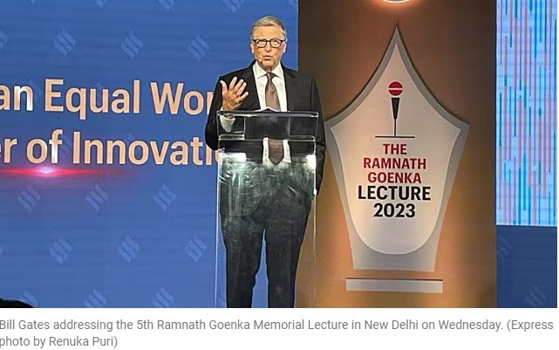

Please describe what is in this image?


In [ ]:
print("----------prompt-----------")
print_multimodal_prompt(contents_image)

In [ ]:
gemini_vision(contents_image, model = multimodal_model)

' This is an image of Bill Gates giving a speech at the 5th Ramnath Goenka Memorial Lecture in New Delhi. He is standing at a podium with a large screen behind him that says "An Equal World of Innovation."'

# **Multimodality : video + Text**





### **Load a video and a prompt.**

### **The video loads from a GCP bucket.**

In [ ]:
from vertexai.generative_models import (
    GenerativeModel,
    Image,
    Part,
)

In [ ]:
file_path = "dlai-sc-gemini-bucket/pixel8.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

In [ ]:
import IPython ## Displaying Rich Media video, HTML, images

In [ ]:
IPython.display.Video(video_url, width=450)

In [ ]:
prompt = """
Answer the following questions using the video only:
 - What is the main person's profession?
 - What are the main features of the phone highlighted?
 - Which city was this recorded in?
"""

In [ ]:
video = Part.from_uri(video_uri, mime_type="video/mp4")
contents_video = [prompt, video]

**the cost of running this cell would be high so keeping next cell in markdown mode**

In [ ]:
# responses_4 = multimodal_model.generate_content(contents_video, stream=True)

In [ ]:
for response in responses_4:
  print(response.text, end="")

 - The main person's profession is not explicitly stated in the video.
- The main features of the phone highlighted are the camera's ability to take clear photos and videos in low-light conditions, and the ability to record video with a feature called "Video Boost".
- The video was recorded in Tokyo, Japan.

## **Gemini Model Parameters**

 **Load an image**

**we will be using the gemini-1.0-pro-vision-001 model**

**we will first run the model with default parameters**

In [ ]:
image_1 = Image.load_from_file("steve_jobs.jpg")

In [ ]:
prompt_1 = """Write what is happening in the following image
from a unique perspective."""

In [ ]:
contents = [image_1, prompt_1]

-------Prompt--------


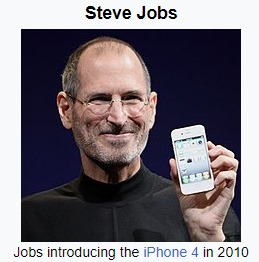

Write what is happening in the following image
from a unique perspective.


In [ ]:

print("-------Prompt--------")
print_multimodal_prompt(contents)

In [ ]:

response_1 = multimodal_model.generate_content(
    contents,
    stream=True
)

In [ ]:
for response in response_1:
    print(response.text, end="")

 Steve Jobs is introducing the iPhone 4 in 2010. He is smiling and holding the phone in his hand. He is wearing a black turtleneck and glasses. The background is a dark blue.

### **Temperature, Top k**

setting temperature largely affect the token generation. if we keep the k is small then generation of token would be deterministic.

if temperature is large then token generation would be more randomness would be there. more diverse, more creative

top_k method restrict the model to choosing from the top k tokens with the highest probability

low temperature and low k only used when we want the output most deterministic and factual

In [ ]:
from vertexai.generative_models import GenerationConfig

### **Setting temperature=0.0 and top_k=1**

In [ ]:
generation_config_1 = GenerationConfig(
    temperature=0.0,
    top_k=1,
)

In [ ]:
response_zero_temp = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config_1)

In [ ]:
print(response_zero_temp)

 Steve Jobs is introducing the iPhone 4 in 2010. He is smiling and holding the phone in his hand. He is wearing a black turtleneck and glasses. The background is a dark blue.


In [ ]:
responses_zero_temp = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config_1)

print(response_zero_temp)

 Steve Jobs is introducing the iPhone 4 in 2010. He is smiling and holding the phone in his hand. He is wearing a black turtleneck and glasses. The background is a dark blue.


**Changing the configuration settings**

**keeping the temperature =1 , top_k = 40**

**now you will observe the high diversity, randomness and creativeness in this**

In [ ]:
generation_config_2 = GenerationConfig(
    temperature=1,
    top_k=40,
)

In [ ]:
responses_high_temp_topk = gemini_vision_parameters(
                            contents,
                            multimodal_model,
                            generation_config_2)

In [ ]:
print(responses_high_temp_topk)

 Steve Jobs is holding the iPhone 4 in his hand. He has a slight smile on his face and looks to be in a good mood. He is wearing a black turtleneck and glasses. The iPhone 4 was released in 2010 and was a revolutionary phone. It had a new design, a better camera, and a faster processor. It was the first iPhone to have a front-facing camera. This allowed people to take selfies and make video calls. It was also the first iPhone to have a Retina display. This made the screen look much sharper and more vibrant. The iPhone 4 was a very popular phone and helped make Apple a dominant force in the smartphone market.


# **Top_P:**

0 < p ≤ 1. Common values are between 0.7 and 0.95

Limits by cumulative probability, dynamically adjusting the number of tokens based on their probabilities.

**Low Temperature + Low top_p: Very deterministic and focused output.**

**High Temperature + High top_p: More creative and diverse output.**



In [ ]:
generation_config_3 = GenerationConfig(
    temperature=1,
    top_k=40,
    top_p=0.01,
)

In [ ]:
responses_high_temp_topp = gemini_vision_parameters(
                            contents,
                            multimodal_model,
                            generation_config_3)

print(responses_high_temp_topp)

 Steve Jobs is introducing the iPhone 4 in 2010. He is smiling and holding the phone in his hand. He is wearing a black turtleneck and glasses. The background is a dark blue.


## **Max Output Token**

it depends on us how much token we want in our output . let take an example of inshort news summarization website which generate the token only upto 100 which means max_output token limit in its website algorithm is 100

In [ ]:
generation_config_4 = GenerationConfig(
    max_output_tokens=10,
)

In [ ]:
responses_max_output = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config_4)

print(responses_max_output)

 Steve Jobs is introducing the iPhone 4 in


# **Stop Sequences**

The range for stop_sequences is 1 (inclusive) to 17 (exclusive)

Multiple (no more than 16) words, numbers, space or special characters can be passed as a list.

The model response stops just before the first time it encounters any stop sequence

In [ ]:
generation_config_5 = GenerationConfig(
    stop_sequences=["panda"]
)

In [ ]:
responses_stop = gemini_vision_parameters(
                    contents,
                    multimodal_model,
                    generation_config_5)

print(responses_stop)


 Steve Jobs is introducing the iPhone 4 in 2010. He is holding the phone in his hand and smiling. He is wearing a black turtleneck and glasses. He is standing in front of a dark blue background.
